Importing liberaries

In [1]:
import numpy as np
import pandas as pd 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import roc_auc_score
from  sklearn.metrics import roc_curve
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import shapiro
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
bank= pd.read_csv(r'D:\ml\Exam\24 Machine Learning Question Paper 1 with datasets\24 Machine Learning Question Paper 1 with datasets/bank.csv',index_col=False,sep=";")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Analyzing Data

In [4]:
bank.shape

(41188, 21)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
bank.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Checking Missing values 

In [9]:
Total = bank.isnull().sum().sort_values(ascending=False)          
Percent = (bank.isnull().sum()*100/bank.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


<AxesSubplot:>

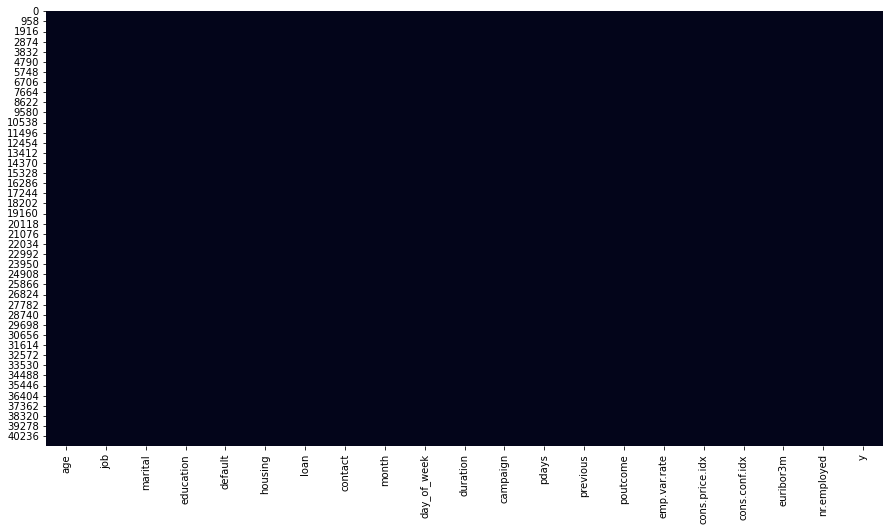

In [10]:
sns.heatmap(bank.isnull(), cbar=False)

Checking for outliers

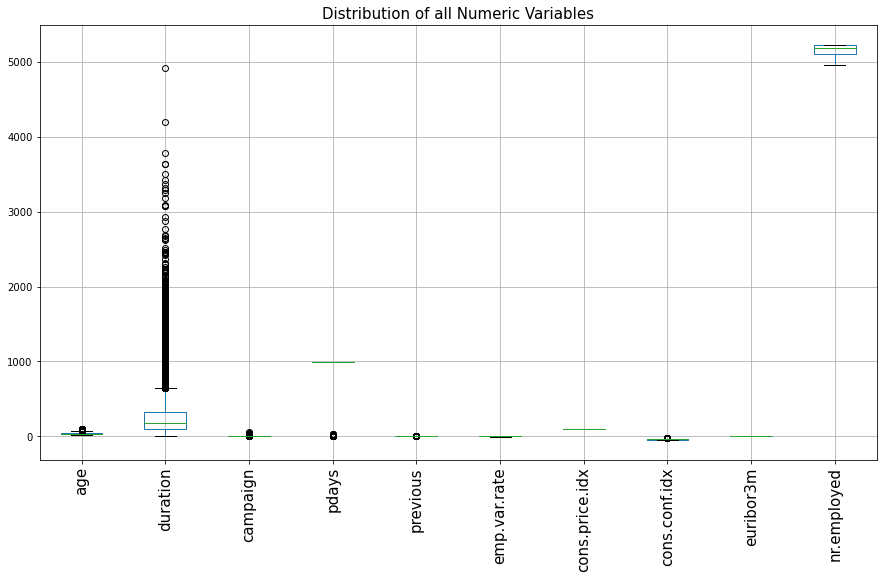

In [11]:
bank.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

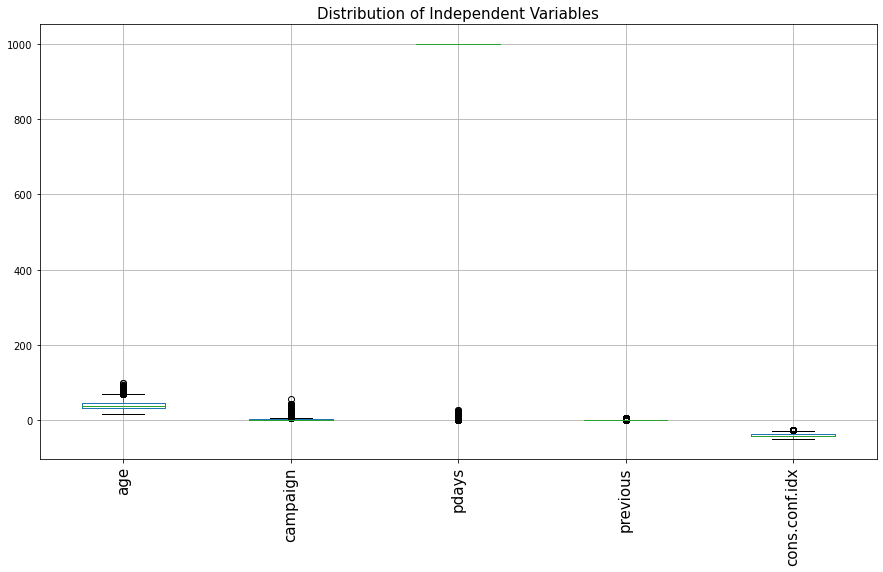

In [12]:
cols = [ 'age','campaign','pdays','previous','cons.conf.idx']
bank[cols].boxplot()
plt.title('Distribution of Independent Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [13]:
# calculate the first quartile
Q1 = bank.quantile(0.25)

# calculate the third quartile
Q3 = bank.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [14]:
bank= bank[~((bank < (Q1 - 1.5 * IQR)) | (bank > (Q3 + 1.5 * IQR))).any(axis=1)]
bank= bank.reset_index(drop = True)

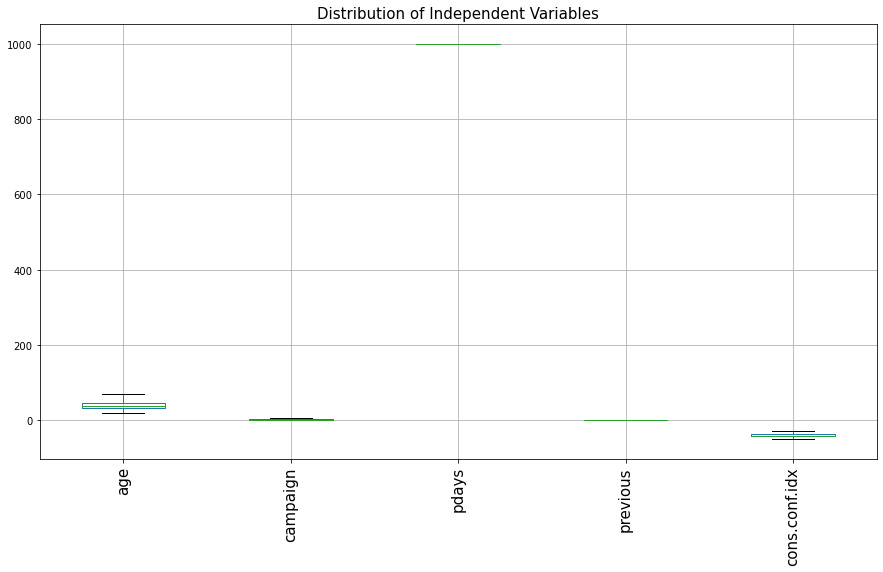

In [15]:
cols = [ 'age','campaign','pdays','previous','cons.conf.idx']
bank[cols].boxplot()
plt.title('Distribution of Independent Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [16]:
bank.shape

(30360, 21)

Label encoding target varirable

In [17]:
bank['y'] = bank['y'].replace('no', 0)
bank['y'] = bank['y'].replace('yes', 1)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
frequency = bank.y.value_counts()
frequency

0    28705
1     1655
Name: y, dtype: int64

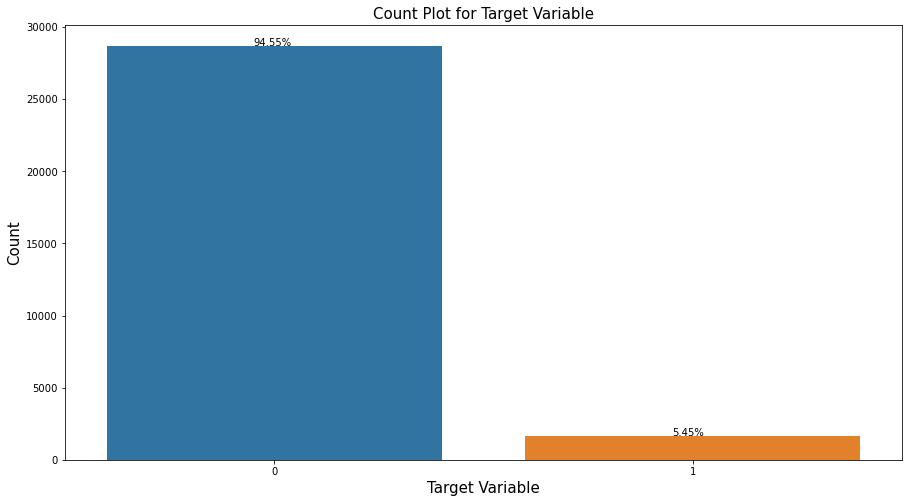

In [19]:
sns.countplot(x = bank.y)
plt.text(x = -0.05, y = bank.y.value_counts()[0],
         s = str(round((frequency[0])*100/len(bank.y),2)) + '%')
plt.text(x = 0.95, y = bank.y.value_counts()[1],
         s = str(round((frequency[1])*100/len(bank.y),2)) + '%')
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [20]:
data_with_dummies = pd.get_dummies(bank.drop(['y'],axis = 1),drop_first=True)
data_with_dummies['y'] = bank.y
data_with_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


Selecting features

In [21]:
X = data_with_dummies.drop(['y'],axis = 1)
y = data_with_dummies['y'].astype('int64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [23]:
labels = X.columns.values
feature_importance = []
for feature in zip(labels, clf.feature_importances_):
    feature_importance.append(feature)

In [24]:
feature_importance

[('age', 0.10461287460475402),
 ('duration', 0.24242586621328416),
 ('campaign', 0.046269601639138756),
 ('pdays', 0.0),
 ('previous', 0.0),
 ('emp.var.rate', 0.032159974854965065),
 ('cons.price.idx', 0.03225456811330194),
 ('cons.conf.idx', 0.0340124667494754),
 ('euribor3m', 0.11737454578038901),
 ('nr.employed', 0.05150954866227487),
 ('job_blue-collar', 0.010361520344119381),
 ('job_entrepreneur', 0.005273694590441177),
 ('job_housemaid', 0.004596768195527151),
 ('job_management', 0.009042431664941397),
 ('job_retired', 0.006805451304089711),
 ('job_self-employed', 0.005944645005379106),
 ('job_services', 0.007562754620464354),
 ('job_student', 0.006850433706678864),
 ('job_technician', 0.013840798814646586),
 ('job_unemployed', 0.005327277391622658),
 ('job_unknown', 0.0018304179127983202),
 ('marital_married', 0.015537805609456718),
 ('marital_single', 0.014296050019866953),
 ('marital_unknown', 0.0008935908238687064),
 ('education_basic.6y', 0.004704171294002366),
 ('education_

In [25]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.01)

In [26]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.01)

In [27]:
selected_features = []
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(labels[feature_list_index])

In [28]:
data_selected = data_with_dummies[selected_features]
data_selected.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_technician,marital_married,marital_single,education_high.school,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_oct,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0


Handling imbalace data

In [29]:
import imblearn
from imblearn.over_sampling import SMOTE


In [30]:
data_selected.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_technician,marital_married,marital_single,education_high.school,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_oct,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0


In [31]:
X=data_selected
y=data_with_dummies['y'].astype('int64')

In [32]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [33]:
y.value_counts()

0    28705
1    28705
Name: y, dtype: int64

Standadising data

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(data_selected)

MinMaxScaler()

In [37]:
ata_standardised = scaler.fit_transform(data_selected)

Defining user defined funtions for checking accuracy measure 

In [38]:
def get_test_report(model):
    
    return(classification_report(y_test, y_pred))

In [39]:
def plot_confusion_matrix(model):
    cm= confusion_matrix(y_test , y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',],
                              index=['Actual:0','Actual:1']) 
    sns.heatmap(conf_matrix , annot= True , fmt='d' , cmap= ListedColormap(['lightskyblue']),
               cbar=False , linewidths = 0.1 , annot_kws = { 'size':25})
    plt.xticks(fontsize =20)
    plt.yticks(fontsize = 20)
    plt.show()

In [40]:
def kappa_score(model):

    return(cohen_kappa_score(y_test, y_pred))

In [90]:
def plot_roc(model):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC Curve for Loan Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [42]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

Logistic Regression MODEL

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [44]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (40187, 23)
y_train (40187,)
X_test (17223, 23)
y_test (17223,)


In [45]:
 log_reg_model = sm.Logit(y_train , X_train).fit()
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.176845
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                40187
Model:                          Logit   Df Residuals:                    40164
Method:                           MLE   Df Model:                           22
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.7449
Time:                        16:01:52   Log-Likelihood:                -7106.9
converged:                       True   LL-Null:                       -27855.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0267      0.002    -10.799      0.

In [46]:
 y_pred_prob = log_reg_model.predict(X_test)


In [47]:
 y_pred = log_reg_model.predict(X_test)
y_pred.head()

53299    0.743365
40972    0.989025
12428    0.041592
46797    0.999731
21703    0.007608
dtype: float64

In [48]:
y_pre=[ '0' if x< 0.5 else '1' for x in y_pred]

In [49]:
 y_pred = np.array(y_pre , dtype = np.float32)
y_pred[0:5]

array([1., 1., 0., 1., 0.], dtype=float32)

In [50]:
test=get_test_report(log_reg_model)
print(test)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8624
           1       0.93      0.94      0.93      8599

    accuracy                           0.93     17223
   macro avg       0.93      0.93      0.93     17223
weighted avg       0.93      0.93      0.93     17223



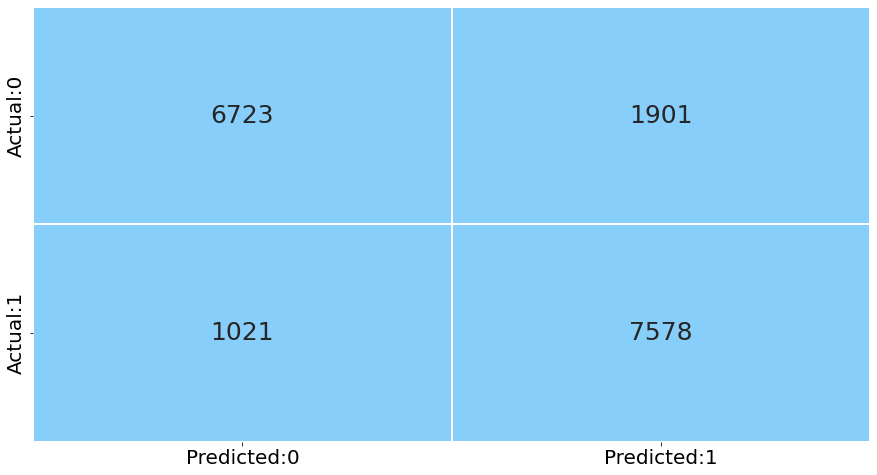

In [86]:
plot_confusion_matrix(log_reg_model)

In [52]:
kappa_score(log_reg_model)

0.8610017587422187

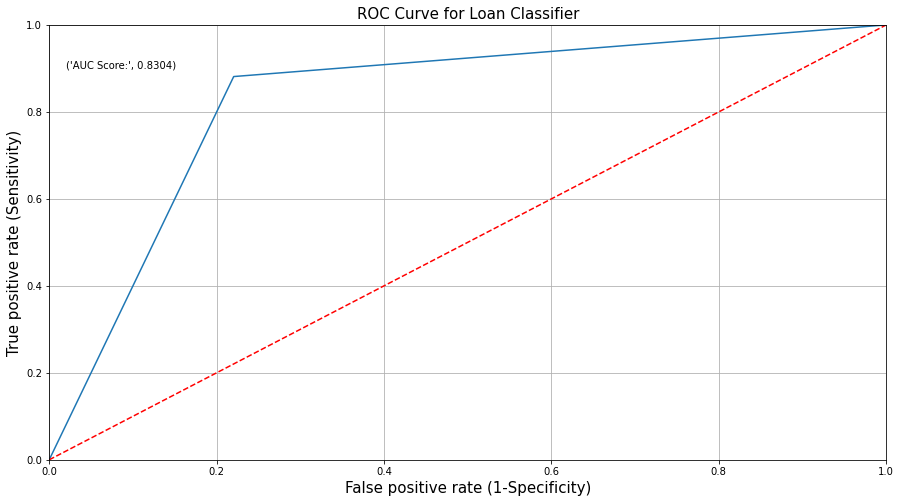

In [91]:
plot_roc(log_reg_model)

In [54]:
update_score_card(model_name= 'logist reg')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,logist reg,0.979574,0.925696,0.935923,0.9305,0.861002,0.930781


AdaBoost MODEL

In [55]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=10)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [56]:
y_pred= adaboost.predict(X_test)

In [57]:
 y_pred_prob = adaboost.predict(X_test)

In [58]:
test=get_test_report(adaboost)
print(test)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8624
           1       0.94      0.95      0.94      8599

    accuracy                           0.94     17223
   macro avg       0.94      0.94      0.94     17223
weighted avg       0.94      0.94      0.94     17223



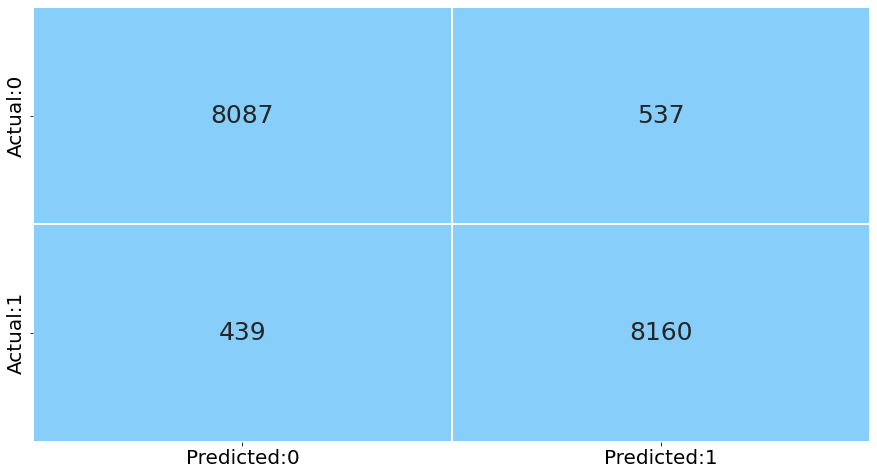

In [59]:
plot_confusion_matrix(adaboost)

In [60]:
kappa_score(adaboost)

0.8866648163181162

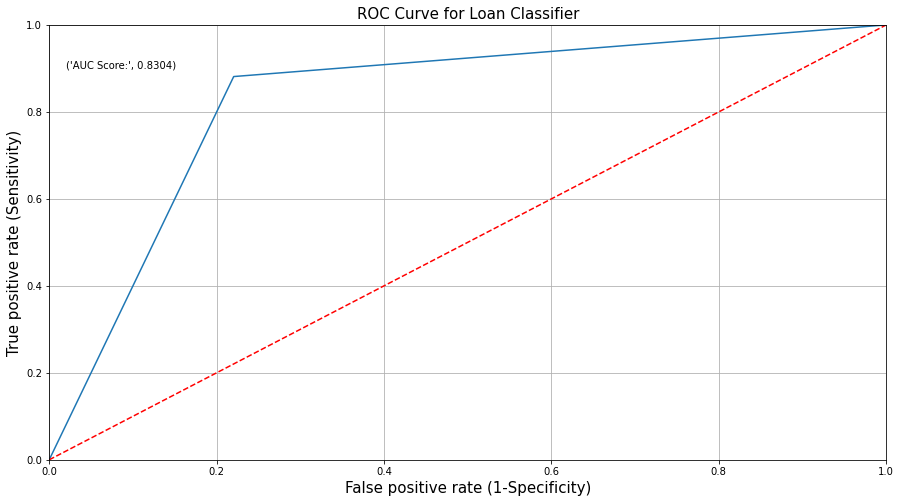

In [92]:
plot_roc(adaboost)

In [62]:
update_score_card(model_name= 'Adaboost')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,logist reg,0.979574,0.925696,0.935923,0.9305,0.861002,0.930781
1,Adaboost,0.94334,0.938255,0.948948,0.943332,0.886665,0.943571


Naïve Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
gnb = GaussianNB()
GNB = OneVsRestClassifier(gnb)
GNB.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [64]:
y_pred= GNB.predict(X_test)

In [65]:
 y_pred_prob = GNB.predict(X_test)

In [66]:
test=get_test_report(GNB)
print(test)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      8624
           1       0.90      0.84      0.87      8599

    accuracy                           0.87     17223
   macro avg       0.88      0.87      0.87     17223
weighted avg       0.88      0.87      0.87     17223



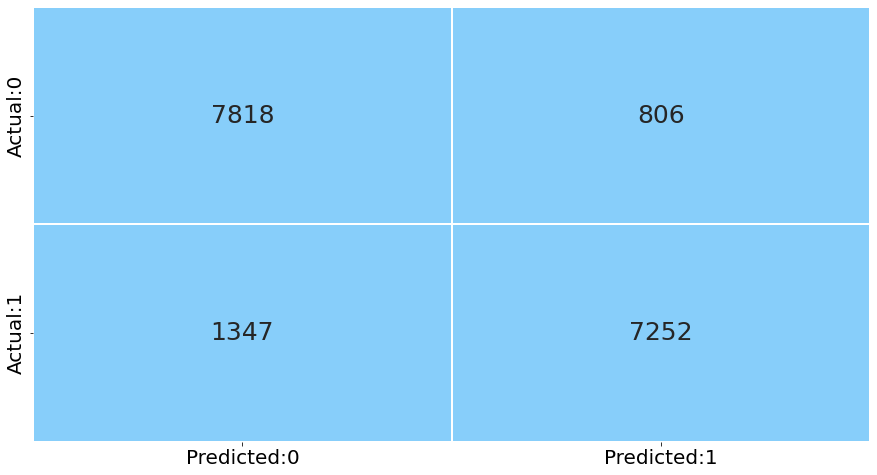

In [67]:
plot_confusion_matrix(GNB)

In [68]:
kappa_score(GNB)

0.7499621566197474

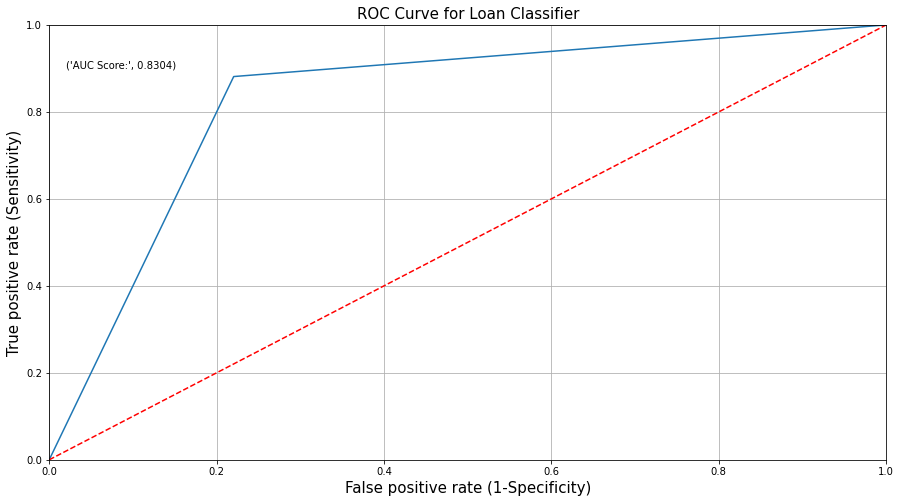

In [93]:
plot_roc(GNB)

In [70]:
update_score_card(model_name= 'GNB')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,logist reg,0.979574,0.925696,0.935923,0.9305,0.861002,0.930781
1,Adaboost,0.94334,0.938255,0.948948,0.943332,0.886665,0.943571
2,GNB,0.874947,0.899975,0.843354,0.874993,0.749962,0.870745


In [ ]:
KNN MODEL

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

In [72]:
y_pred= knn_model.predict(X_test)

In [73]:
 y_pred_prob = knn_model.predict(X_test)

In [74]:
test=get_test_report(knn_model)
print(test)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8624
           1       0.89      0.98      0.94      8599

    accuracy                           0.93     17223
   macro avg       0.94      0.93      0.93     17223
weighted avg       0.94      0.93      0.93     17223



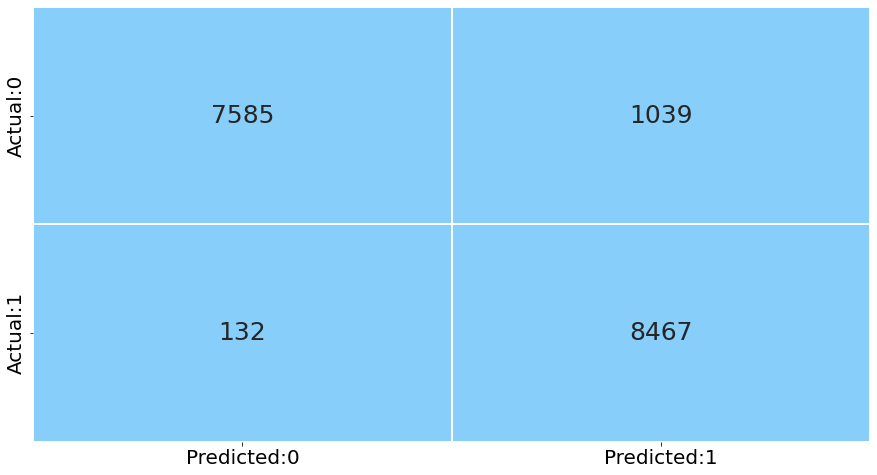

In [75]:
plot_confusion_matrix(knn_model)

In [76]:
kappa_score(knn_model)

0.8640395438999011

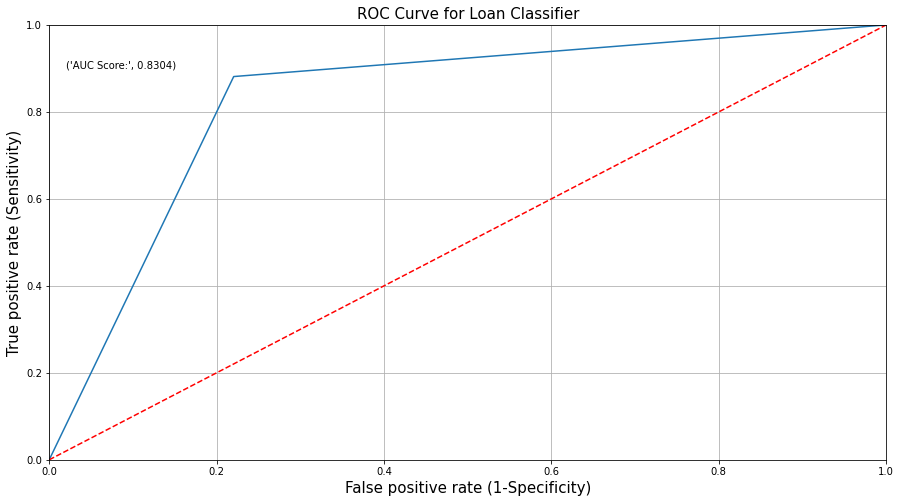

In [94]:
plot_roc(knn_model)

In [78]:
update_score_card(model_name= 'knn_model')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,logist reg,0.979574,0.925696,0.935923,0.9305,0.861002,0.930781
1,Adaboost,0.94334,0.938255,0.948948,0.943332,0.886665,0.943571
2,GNB,0.874947,0.899975,0.843354,0.874993,0.749962,0.870745
3,knn_model,0.932086,0.890701,0.984649,0.93201,0.86404,0.935322


In [ ]:
SVM MODEL

In [79]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [80]:
y_pred= svclassifier.predict(X_test)

In [81]:
 y_pred_prob = svclassifier.predict(X_test)

In [82]:
test=get_test_report(svclassifier)
print(test)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      8624
           1       0.80      0.88      0.84      8599

    accuracy                           0.83     17223
   macro avg       0.83      0.83      0.83     17223
weighted avg       0.83      0.83      0.83     17223



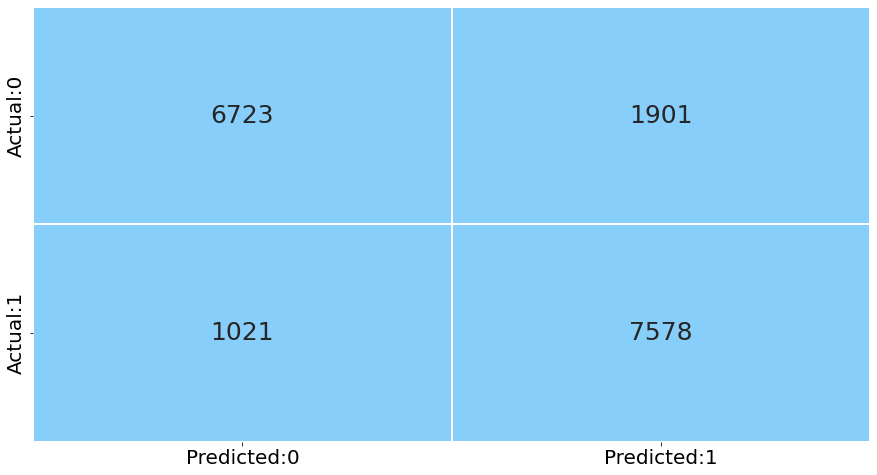

In [83]:
plot_confusion_matrix(svclassifier)

In [84]:
kappa_score(svclassifier)

0.6607359005088611

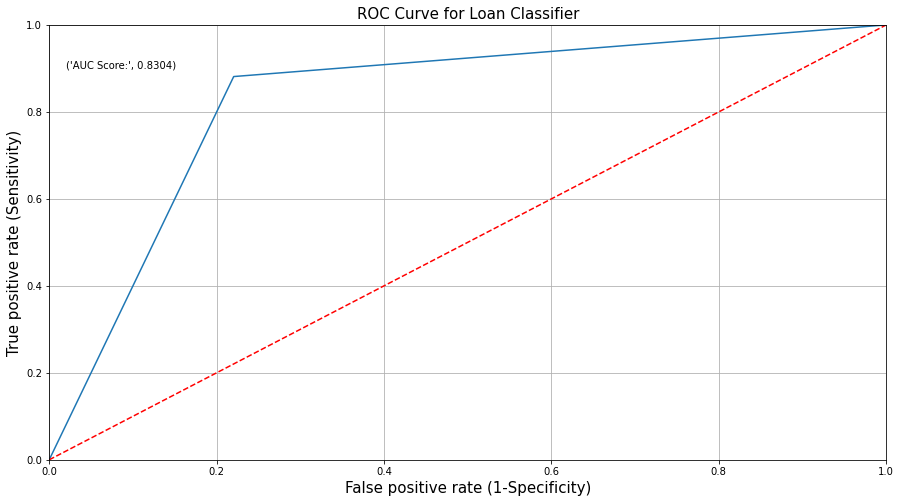

In [96]:
plot_roc(svclassifier)

In [85]:
update_score_card(model_name= 'svclassifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,logist reg,0.979574,0.925696,0.935923,0.9305,0.861002,0.930781
1,Adaboost,0.94334,0.938255,0.948948,0.943332,0.886665,0.943571
2,GNB,0.874947,0.899975,0.843354,0.874993,0.749962,0.870745
3,knn_model,0.932086,0.890701,0.984649,0.93201,0.86404,0.935322
4,svclassifier,0.830417,0.799451,0.881265,0.830343,0.660736,0.838367


#  <b>Question number 2</b>